# Covid 19 Outbreak Prediction Using Machine Learning

Covid 19 is a infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019. This disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell.

Data Column Information :

The objective of this project is to predict the outbreak of Covid-19 in the world using Machine Learning. The dataset used in this project is taken from Kaggle. The dataset consists of daily level information on the number of affected cases, deaths, and recoveries from Covid-19 from 2020. The data is available from 22 January 2020.

| Column         | Description                                                                                                                                                          |
| -------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Confirmed      | Number of persons confirmed to have Corona Virus                                                                                                                     |
| Deaths         | Number of persons who died due to Corona Virus                                                                                                                       |
| Recovered      | Number of persons who recovered from Corona Virus                                                                                                                    |
| Province/State | Province or State of the country where Corona Virus is spreading                                                                                                     |
| Country        | Country where Corona Virus is spreading                                                                                                                              |
| Latitude       | Latitude of the country                                                                                                                                              |
| Longitude      | Longitude of the country                                                                                                                                             |
| Date           | Date of the record update                                                                                                                                            |
| Active         | Number of active cases                                                                                                                                               |
| WHO Region     | A WHO region is one of the six geographical areas into which the World Health Organization (WHO) divides the world for better coordination of public health efforts. |


### Importing Libraries & Data Loading


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [119]:
covid_data = pd.read_csv('covid_19_clean_complete.csv')

### Data Preprocessing


In [120]:
covid_data

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [121]:
covid_data.tail()

Province/State         Country/Region        Lat       Long        Date  \
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa

In [122]:
covid_data.shape

(49068, 10)

In [123]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [124]:
covid_data.rename(columns={"Date": "date", "Province/State": "state", "Country/Region": "country", "Lat": "latitude", "Long": "longitude", "Confirmed": "confirmed", "Deaths": "deaths", "Recovered": "recovered" , }, inplace=True)

In [125]:
covid_data.head()

state      country  latitude  longitude        date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [126]:
covid_data.drop(['Active'], axis=1, inplace=True)

In [127]:
covid_data["active"] = covid_data["confirmed"] - covid_data["deaths"] - covid_data["recovered"]

In [128]:
covid_data.iloc[100:, :]

state                country   latitude   longitude        date  \
100     NaN                Estonia  58.595300   25.013600  2020-01-22   
101     NaN               Eswatini -26.522500   31.465900  2020-01-22   
102     NaN               Ethiopia   9.145000   40.489700  2020-01-22   
103     NaN                   Fiji -17.713400  178.065000  2020-01-22   
104     NaN                Finland  61.924110   25.748151  2020-01-22   
...     ...                    ...        ...         ...         ...   
49063   NaN  Sao Tome and Principe   0.186400    6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727   48.516388  2020-07-27   
49065   NaN                Comoros -11.645500   43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000   71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000   28.233600  2020-07-27   

       confirmed  deaths  recovered             WHO Region  active  
100            0       0          0                 Europe       0  
101            0       0          0                 Africa       0  
102            0       0          0                 Africa       0  
103            0       0          0        Western Pacific       0  
104            0       0          0                 Europe       0  
...          ...     ...        ...                    ...     ...  
49063        865      14        734                 Africa     117  
49064       1691     483        833  Eastern Mediterranean     375  
49065        354       7        328                 Africa      19  
49066       7235      60       6028                 Europe    1147  
49067        505      12        128                 Africa     365  

[48968 rows x 10 columns]

In [129]:
max_date = covid_data[covid_data["date"] == covid_data["date"].max()]
max_date.tail()

state                country   latitude  longitude        date  \
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered             WHO Region  active  
49063        865      14        734                 Africa     117  
49064       1691     483        833  Eastern Mediterranean     375  
49065        354       7        328                 Africa      19  
49066       7235      60       6028                 Europe    1147  
49067        505      12        128                 Africa     365

In [130]:
world_data = max_date.groupby("country")[["confirmed", "active", "deaths", "date"]].sum().reset_index()

In [131]:
world_data.head()

country  confirmed  active  deaths        date
0  Afghanistan      36263    9796    1269  2020-07-27
1      Albania       4880    1991     144  2020-07-27
2      Algeria      27973    7973    1163  2020-07-27
3      Andorra        907      52      52  2020-07-27
4       Angola        950     667      41  2020-07-27

In [132]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    187 non-null    object
 1   confirmed  187 non-null    int64 
 2   active     187 non-null    int64 
 3   deaths     187 non-null    int64 
 4   date       187 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.4+ KB


In [133]:
figure = px.choropleth(world_data, locations="country", locationmode='country names', color="confirmed", hover_name="country", color_continuous_scale="peach", range_color=[1, 1000], title="Countries with Confirmed Cases")
figure.show()

In [134]:
figure = px.choropleth(world_data, locations="country", locationmode="country names", color="active", hover_name="country", range_color=[1, 1000], color_continuous_scale="peach", title="Countries with Active Cases")
figure.show()

In [135]:
figure = px.choropleth(world_data, locations="country", locationmode="country names", color="deaths", hover_name="country", range_color=[1, 1000], color_continuous_scale="peach", title="Countries with Death Cases")
figure.show() 

In [136]:
max_date_confirmed = max_date.groupby("country")["confirmed"].sum().sort_values(ascending=False).head(20).reset_index()

max_date_confirmed

country  confirmed
0               US    4290259
1           Brazil    2442375
2            India    1480073
3           Russia     816680
4     South Africa     452529
5           Mexico     395489
6             Peru     389717
7            Chile     347923
8   United Kingdom     301708
9             Iran     293606
10        Pakistan     274289
11           Spain     272421
12    Saudi Arabia     268934
13        Colombia     257101
14           Italy     246286
15          Turkey     227019
16      Bangladesh     226225
17          France     220352
18         Germany     207112
19       Argentina     167416

In [137]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90 , fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Confirmed Cases", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 20 Countries with Most Confirmed Cases", fontsize=15)
sns.barplot(x= max_date_confirmed.confirmed, y= max_date_confirmed.country , palette="viridis")
plt.show()

In [138]:
max_date_actives = max_date.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()

max_date_actives

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

In [139]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90 , fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Active Cases", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 20 Countries with Most Active Cases", fontsize=15)
sns.barplot(x=max_date_actives.active, y=max_date_actives.country , palette="viridis")
plt.show()

In [140]:
#current top countries having most recovered cases
max_date_recovered=max_date.groupby("country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
max_date_recovered

country  recovered
0         Brazil    1846641
1             US    1325804
2          India     951166
3         Russia     602249
4          Chile     319954
5         Mexico     303810
6   South Africa     274925
7           Peru     272547
8           Iran     255144
9       Pakistan     241026
10  Saudi Arabia     222936
11        Turkey     210469
12         Italy     198593
13       Germany     190314
14         Spain     150376
15      Colombia     131161
16    Bangladesh     125683
17         Qatar     106328
18        France      81212
19         China      78869

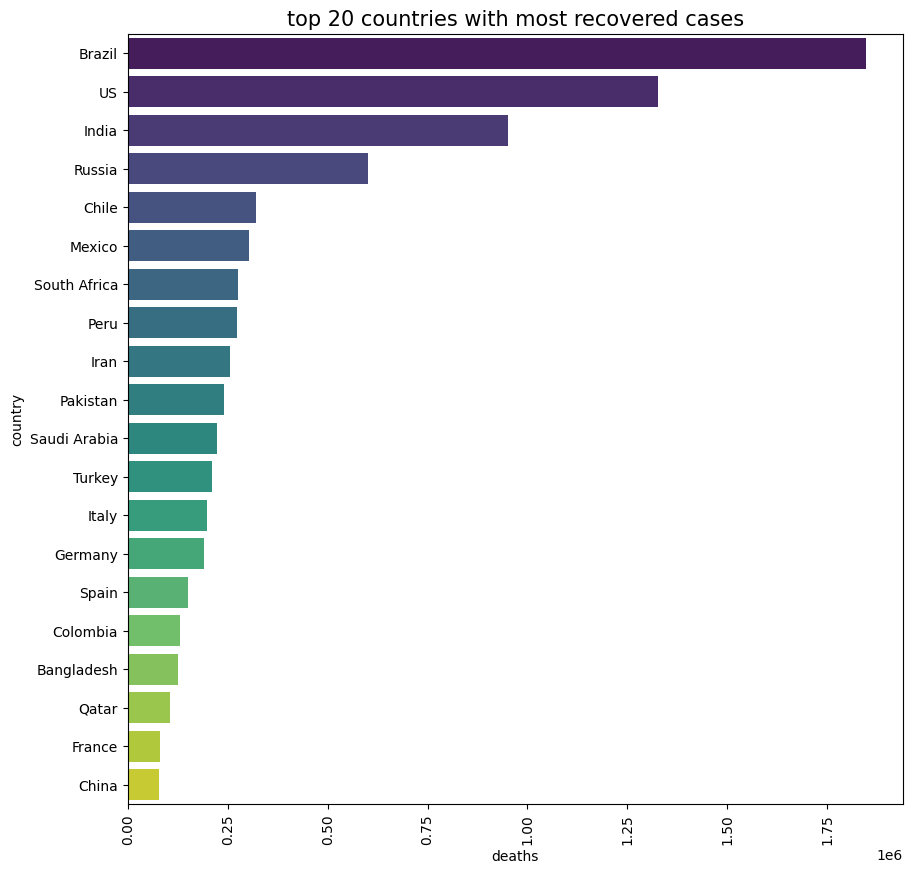

In [141]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("deaths",fontsize=10)
plt.ylabel("country",fontsize=10)
plt.title("top 20 countries with most recovered cases",fontsize=15)

ax=sns.barplot(x=max_date_recovered.recovered,y=max_date_recovered.country,palette="viridis")

In [142]:
max_date_deaths = max_date.groupby("country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()

max_date_deaths

country  deaths
0               US  148011
1           Brazil   87618
2   United Kingdom   45844
3           Mexico   44022
4            Italy   35112
5            India   33408
6           France   30212
7            Spain   28432
8             Peru   18418
9             Iran   15912
10          Russia   13334
11         Belgium    9822
12           Chile    9187
13         Germany    9125
14          Canada    8944
15        Colombia    8777
16    South Africa    7067
17     Netherlands    6160
18        Pakistan    5842
19          Sweden    5700

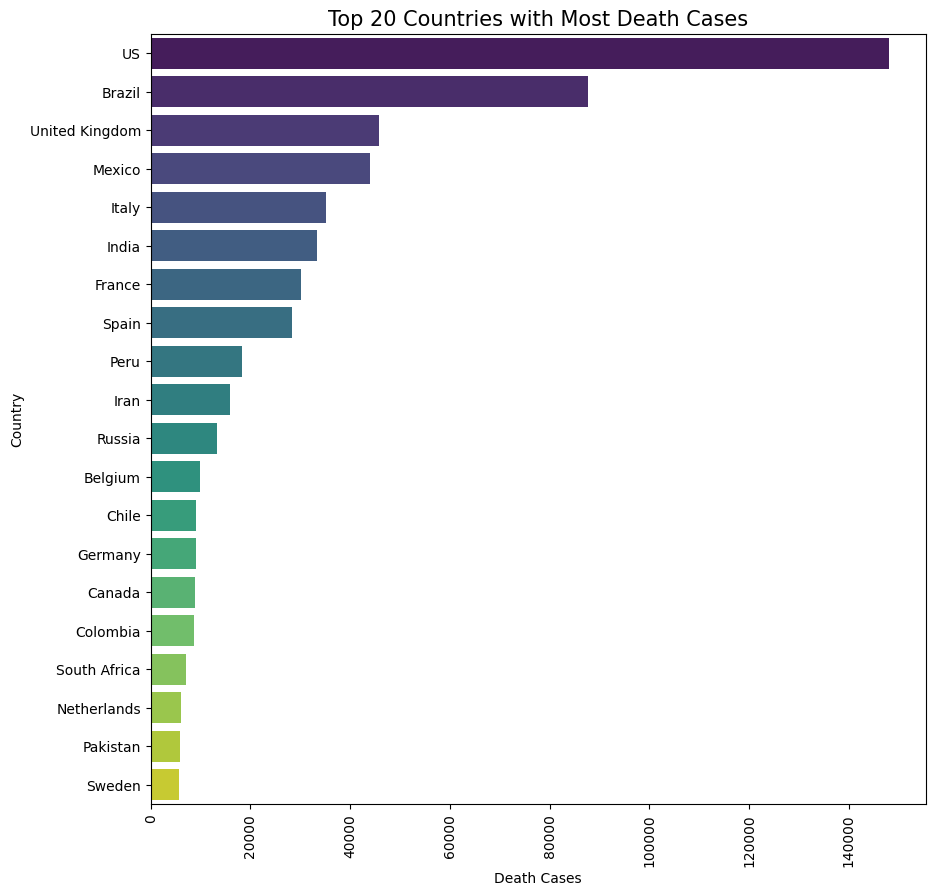

In [143]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90 , fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Death Cases", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.title("Top 20 Countries with Most Death Cases", fontsize=15)
sns.barplot(x=max_date_deaths.deaths, y=max_date_deaths.country , palette="viridis")
plt.show()

In [144]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

print("Earliest and Latest Entry Dates")
print()
print(f"Earliest Entry:   {covid_data['date'].min()}")
print(f"Latest Entry:     {covid_data['date'].max()}")
print(f"Total Days:      {(covid_data['date'].max() - covid_data['date'].min()).days}")

Earliest and Latest Entry Dates

Earliest Entry:   2020-01-22 00:00:00
Latest Entry:     2020-07-27 00:00:00
Total Days:      187


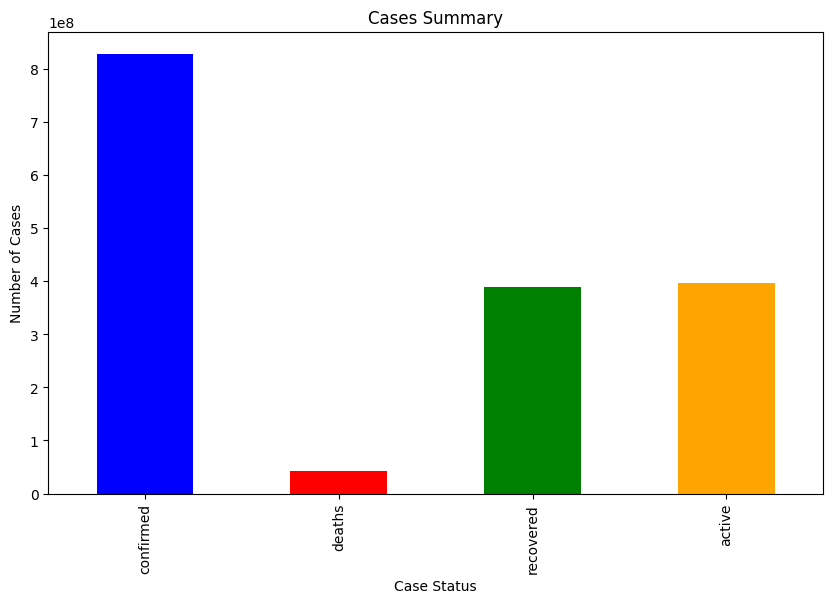

In [145]:
status = ['confirmed', 'deaths', 'recovered', 'active']
columns_sum = covid_data[status].sum().plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'orange'])
plt.title('Cases Summary')
plt.ylabel('Number of Cases')
plt.xlabel('Case Status')
plt.show()

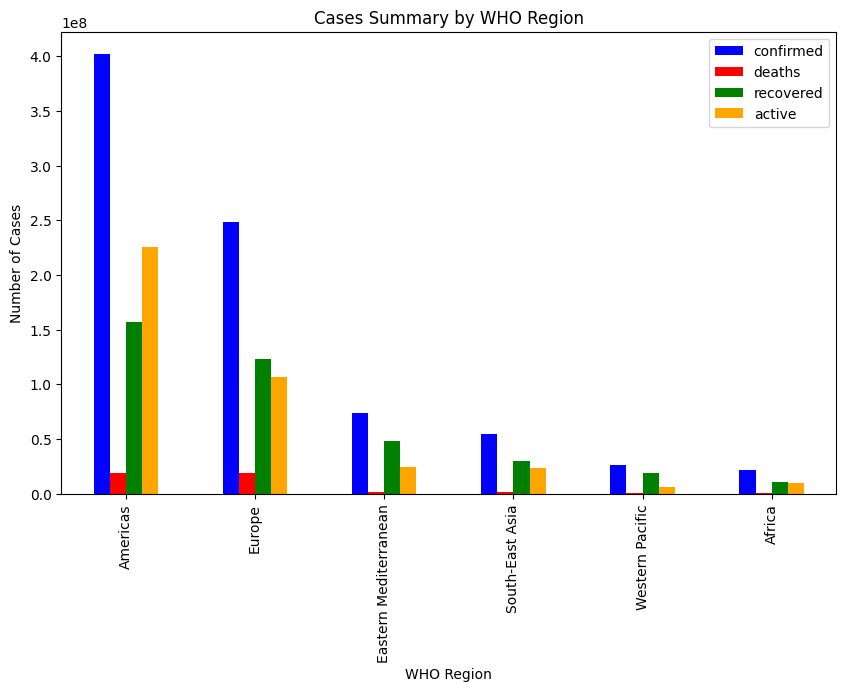

In [146]:
WHO = covid_data['WHO Region'].unique()
column_sum = covid_data.groupby('WHO Region')[status].sum().sort_values(by='confirmed', ascending=False).head(10).plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'orange'])
plt.title('Cases Summary by WHO Region')
plt.ylabel('Number of Cases')
plt.xlabel('WHO Region')
plt.show()

In [147]:
date_stats = covid_data.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
date_stats.head()


date  confirmed  deaths  recovered
0 2020-01-22        555      17         28
1 2020-01-23        654      18         30
2 2020-01-24        941      26         36
3 2020-01-25       1434      42         39
4 2020-01-26       2118      56         52

In [148]:
px.line(date_stats, x='date', y='confirmed', title='Worldwide Confirmed Cases Over Time')


In [149]:
px.line(date_stats, x='date', y='deaths', title='Worldwide Death Cases Over Time')

In [150]:
px.line(date_stats, x='date', y='recovered', title='Worldwide Recovered Cases Over Time')

In [151]:
temp = covid_data.groupby('date')[['recovered', 'deaths', 'active']].sum().reset_index()
temp = temp.melt(id_vars="date", value_vars=['recovered', 'deaths', 'active'],
                 var_name='case', value_name='count')


fig = px.line(temp, x="date", y="count", color='case',
             title='Cases over time: Line Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()


fig = px.area(temp, x="date", y="count", color='case',
             title='Cases over time: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()

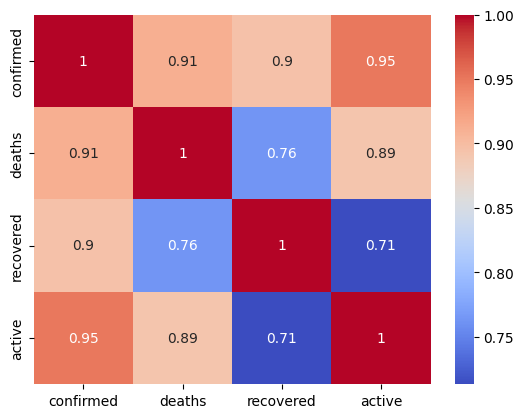

In [152]:
list1 = ["confirmed", "deaths", "recovered", "active"]
sns.heatmap(covid_data[list1].corr(), annot=True, cmap="coolwarm")
plt.show()

In [153]:
df = covid_data
df["date"] = pd.to_datetime(df["date"])
df["date"] = df["date"].dt.strftime('%m/%d/%y')
df = df.fillna('-')
fig = px.density_mapbox(df, lat="latitude", lon="longitude", z="confirmed", radius=20, zoom=1, 
                        hover_data=["country", "state", "confirmed"], range_color=[0, 1000],
                        mapbox_style='carto-positron', animation_frame="date", title="Speard of Covid-19")
fig.update_layout(margin={"r":0, "t":30, "l":0, "b":0})
fig.show()

In [154]:
covid_data.isnull().sum()

state         34404
country           0
latitude          0
longitude         0
date              0
confirmed         0
deaths            0
recovered         0
WHO Region        0
active            0
dtype: int64

<Axes: >

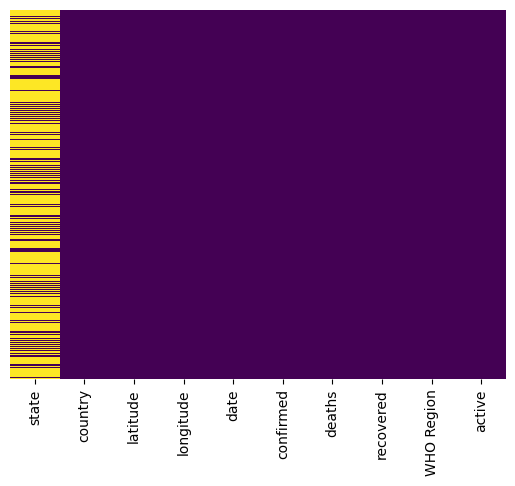

In [155]:
sns.heatmap(covid_data.isnull(), cbar=False, cmap='viridis' , yticklabels=False)

In [156]:
covid_data['state'] = covid_data['state'].fillna('Unknown')

<Axes: >

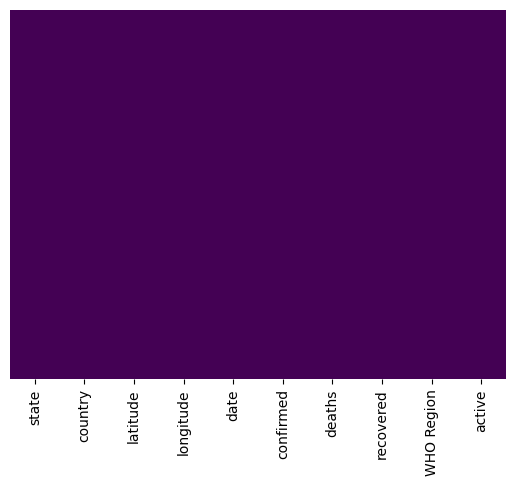

In [157]:
sns.heatmap(covid_data.isnull(), cbar=False, cmap='viridis' , yticklabels=False)

In [158]:
# Detecting Outliers
num_cols = df.select_dtypes(include=['int', 'float']).columns
def count_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    num_outliers = sum((column > upper_limit) | (column < lower_limit))
    return num_outliers

for col in num_cols:
    num_outliers = count_outliers_iqr(df[col])
    print(f"Number of outliers in {col} : {num_outliers}")

Number of outliers in latitude : 376
Number of outliers in longitude : 0
Number of outliers in confirmed : 8817
Number of outliers in deaths : 9077
Number of outliers in recovered : 7936
Number of outliers in active : 8914


In [159]:
def count_and_remove_outliers_iqr(df):
    # Define a function to count outliers using IQR method
    def count_outliers_iqr(column):
        q1 = np.percentile(column, 25)
        q3 = np.percentile(column, 75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        num_outliers = sum((column > upper_limit) | (column < lower_limit))
        return num_outliers
    
    # Define a function to remove outliers using IQR method
    def remove_outliers_iqr(column):
        q1 = np.percentile(column, 25)
        q3 = np.percentile(column, 75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        return column[(column >= lower_limit) & (column <= upper_limit)]
    
    # Iterate over numeric columns
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    for col in num_cols:
        # Count outliers
        num_outliers = count_outliers_iqr(df[col])
        print(f"Number of outliers in {col}: {num_outliers}")
        
        # Remove outliers
        df[col] = remove_outliers_iqr(df[col])
    
    return df

# Call the function to count and remove outliers
cleaned_df = count_and_remove_outliers_iqr(df)

# Print the cleaned DataFrame
print(cleaned_df)

Number of outliers in latitude: 376
Number of outliers in longitude: 0
Number of outliers in confirmed: 8817
Number of outliers in deaths: 9077
Number of outliers in recovered: 7936
Number of outliers in active: 8914
      state                country   latitude  longitude      date  confirmed  \
0         -            Afghanistan  33.939110  67.709953  01/22/20        0.0   
1         -                Albania  41.153300  20.168300  01/22/20        0.0   
2         -                Algeria  28.033900   1.659600  01/22/20        0.0   
3         -                Andorra  42.506300   1.521800  01/22/20        0.0   
4         -                 Angola -11.202700  17.873900  01/22/20        0.0   
...     ...                    ...        ...        ...       ...        ...   
49063     -  Sao Tome and Principe   0.186400   6.613100  07/27/20      865.0   
49064     -                  Yemen  15.552727  48.516388  07/27/20     1691.0   
49065     -                Comoros -11.645500  43.3333

In [160]:
# Feature Extraction
covid_data.drop(['state', 'latitude', 'longitude'], axis=1, inplace=True)

In [161]:
covid_data.head()

country      date  confirmed  deaths  recovered             WHO Region  \
0  Afghanistan  01/22/20          0       0          0  Eastern Mediterranean   
1      Albania  01/22/20          0       0          0                 Europe   
2      Algeria  01/22/20          0       0          0                 Africa   
3      Andorra  01/22/20          0       0          0                 Europe   
4       Angola  01/22/20          0       0          0                 Africa   

   active  
0       0  
1       0  
2       0  
3       0  
4       0

In [162]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['date'] = covid_data['date'].dt.strftime('%Y-%m-%d')

covid_data.head()

C:\Users\gunna\AppData\Local\Temp\ipykernel_9604\1829629394.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



country        date  confirmed  deaths  recovered  \
0  Afghanistan  2020-01-22          0       0          0   
1      Albania  2020-01-22          0       0          0   
2      Algeria  2020-01-22          0       0          0   
3      Andorra  2020-01-22          0       0          0   
4       Angola  2020-01-22          0       0          0   

              WHO Region  active  
0  Eastern Mediterranean       0  
1                 Europe       0  
2                 Africa       0  
3                 Europe       0  
4                 Africa       0

In [163]:
confirmed = covid_data.groupby('date').sum()['confirmed'].reset_index()
deaths = covid_data.groupby('date').sum()['deaths'].reset_index()
recovered = covid_data.groupby('date').sum()['recovered'].reset_index()

confirmed.head()

date  confirmed
0  2020-01-22        555
1  2020-01-23        654
2  2020-01-24        941
3  2020-01-25       1434
4  2020-01-26       2118

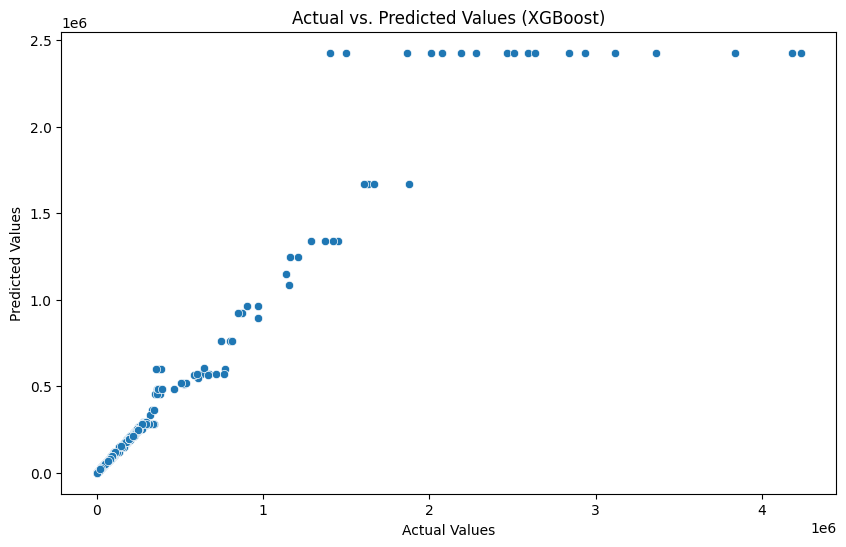

Accuracy: 0.002954962298756878


In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame called covid_data
# Make sure your data is preprocessed and ready for modeling

# Define features and target variable
features = ['confirmed', 'deaths', 'recovered']  # Features
X = covid_data[features]  # Features
y = covid_data['confirmed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy (you can choose a different metric based on your needs)
accuracy = accuracy_score(y_test, y_pred.round())

# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.show()

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy on validation set:      0.94
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      1004
        True       0.93      0.97      0.95      1343

    accuracy                           0.94      2347
   macro avg       0.94      0.94      0.94      2347
weighted avg       0.94      0.94      0.94      2347

Accuracy on test set:      0.94
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      1257
        True       0.93      0.96      0.95      1676

    accuracy                           0.94      2933
   macro avg       0.94      0.94      0.94      2933
weighted avg       0.94      0.94      0.94      2933



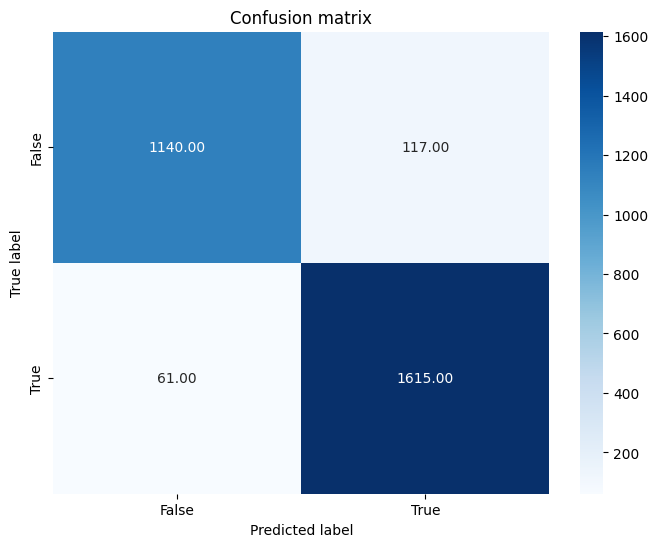

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess COVID-19 data
def load_covid_data(file_path):
    df = pd.read_csv(file_path).dropna()
    return df

# Train an XGBoost classifier and make predictions
def train_xgboost_classifier(data):
    X = data[['Confirmed', 'Active']]  
    y = data['Deaths'].astype(bool)  
    
    X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    model = xgb.XGBClassifier()
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_valid_scaled)

    accuracy = accuracy_score(y_valid, predictions)
    print(f'Accuracy on validation set:      {accuracy:.2f}')
    print(classification_report(y_valid, predictions))

    X_test_scaled = scaler.transform(X_test)
    predictions_test = model.predict(X_test_scaled)

    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f'Accuracy on test set:      {accuracy_test:.2f}')
    print(classification_report(y_test, predictions_test))

    plot_confusion_matrix(model, X_test_scaled, y_test)

    return model

# Plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, classes=None, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    if classes is None:
        classes = np.unique(y_test)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title.lower()

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Main function
file_path = 'covid_19_clean_complete.csv'
covid_data = load_covid_data(file_path)
train_xgboost_classifier(covid_data)
